In [ ]:
# kaggle datasets download -d zalando-research/fashionmnist

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mallikamuskan","key":"a8a8a71d58780d8f8be44320086e6899"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist


 74% 51.0M/68.8M [00:00<00:00, 71.2MB/s]
100% 68.8M/68.8M [00:00<00:00, 92.9MB/s]


In [ ]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/fashion-mnist_train.csv")

In [ ]:
df.shape

(60000, 785)

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=df.iloc[:,1:].values
Y_train=df.iloc[:,0].values

In [ ]:
X_train=X_train/255.
X_train.shape,Y_train.shape

((60000, 784), (60000,))

In [ ]:
def print_img(img):
  img=img.reshape(28,28)
  plt.imshow(img)

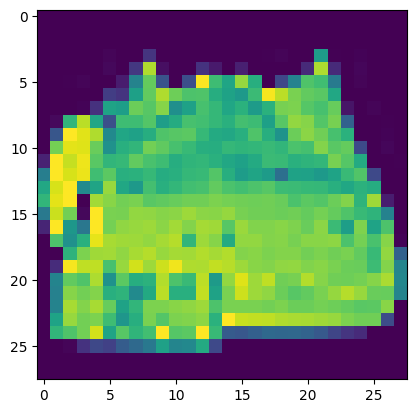

In [ ]:
print_img(X_train[100])

Neural Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
Y_train=one.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_train.shape

(60000, 10)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model=Sequential()

In [ ]:
# first layer
model.add(Dense(units=256,activation='relu',input_shape=(784,)))
model.add(Dropout(rate=0.25))

In [ ]:
# Second layer
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(rate=0.25))

In [ ]:
# Third layer
model.add(Dense(units=10,activation='softmax'))

In [ ]:
# Model compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
model.fit(X_train,Y_train,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 5ms/step - loss: 0.8375 - accuracy: 0.7275 - val_loss: 0.4479 - val_accuracy: 0.8755
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6235 - accuracy: 0.7907 - val_loss: 0.4887 - val_accuracy: 0.8691
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5888 - accuracy: 0.7935 - val_loss: 0.4911 - val_accuracy: 0.8762
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5694 - accuracy: 0.7978 - val_loss: 0.5403 - val_accuracy: 0.6977
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5452 - accuracy: 0.8059 - val_loss: 0.3939 - val_accuracy: 0.8852
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5402 - accuracy: 0.8087 - val_loss: 0.4430 - val_accuracy: 0.8838
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5323 - accuracy: 0.8114 - val_loss: 0.5805 - val_accuracy: 0.7003
Epoch 

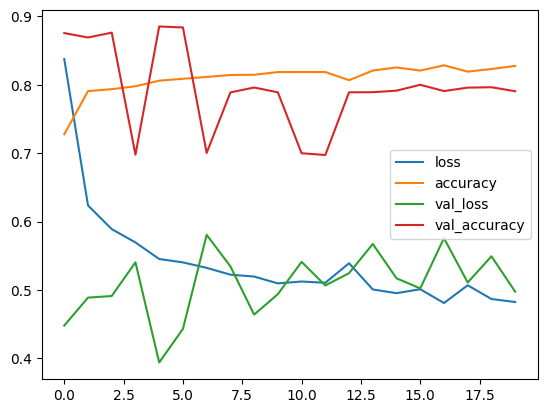

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.show()